In [32]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import numpy.polynomial.polynomial as poly
import warnings
from scipy.signal import argrelextrema
from tabulate import tabulate
import yfinance as yf

from stock import Stock



In [33]:

# Download stock info
stock_info = yf.download("TSLA", start="2014-01-01", end="2017-12-31")
stock_data = pd.DataFrame(stock_info["Close"])

# stock_data

[*********************100%***********************]  1 of 1 completed


### Simple Moving Average

In [34]:
# calculate simple moving average
MA1 = 20
MA2 = 50
MA3 = 100
MA4 = 200
stock_data['ma1'] = stock_data['Close'].rolling(MA1).mean()
stock_data['ma1'].dropna(inplace=True)
stock_data['ma2'] = stock_data['Close'].rolling(MA2).mean()
stock_data['ma2'].dropna(inplace=True)
stock_data['ma3'] = stock_data['Close'].rolling(MA3).mean()
stock_data['ma3'].dropna(inplace=True)
stock_data['ma4'] = stock_data['Close'].rolling(MA4).mean()
stock_data['ma4'].dropna(inplace=True)
stock_data

,Close,ma1,ma2,ma3,ma4
Date,,,,,
2014-01-02,10.006667,NaN,NaN,NaN,NaN
2014-01-03,9.970667,NaN,NaN,NaN,NaN
2014-01-06,9.800000,NaN,NaN,NaN,NaN
2014-01-07,9.957333,NaN,NaN,NaN,NaN
2014-01-08,10.085333,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2017-12-22,21.680000,21.506433,21.510053,22.586700,21.951167
2017-12-26,21.152666,21.508033,21.459013,22.566833,21.974873
2017-12-27,20.775999,21.488333,21.407067,22.536653,21.992753


## plot close price and simple moving average


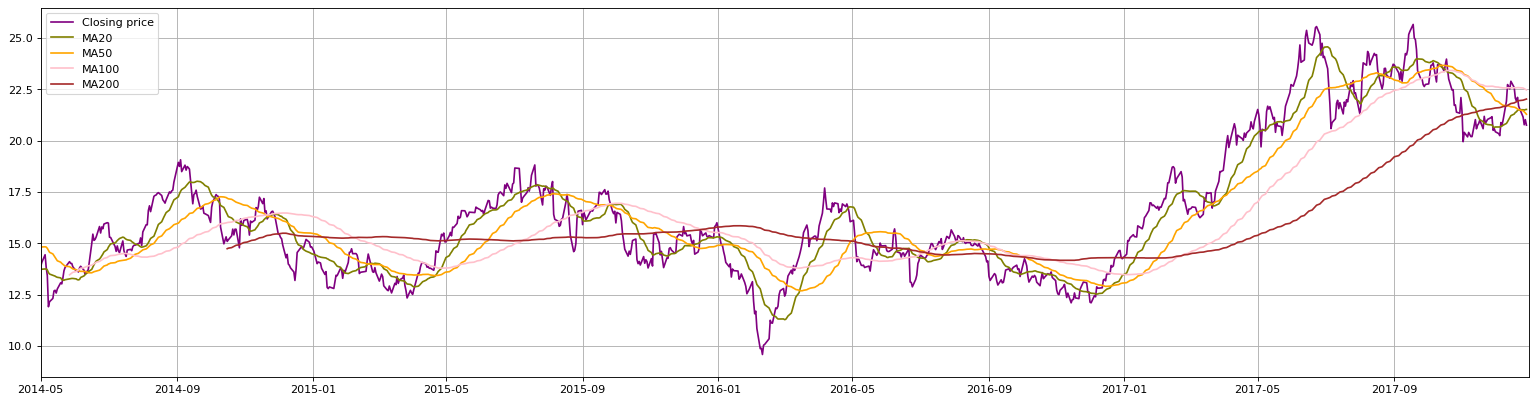

In [35]:
# plot MA
plt.figure(figsize=(24, 6), dpi=80)
plt.plot(stock_data['Close'], label="Closing price", color="purple")
plt.plot(stock_data['ma1'],  label=f"MA{MA1}",color="olive")
plt.plot(stock_data['ma2'], label=f"MA{MA2}", color="orange")
plt.plot(stock_data['ma3'], label=f"MA{MA3}", color="pink")
plt.plot(stock_data['ma4'], label=f"MA{MA4}", color="brown")
plt.legend()
plt.xlim(pd.to_datetime('2014-05-01'), pd.to_datetime('2017-12-31'))
plt.grid(visible=True, which = 'both')
plt.show()

### Exponential Moving Average

In [36]:
# Calculate EMAs
EMA9 = stock_data['Close'].ewm(span=9, adjust=False).mean()
EMA20 = stock_data['Close'].ewm(span=20, adjust=False).mean()
EMA50 = stock_data['Close'].ewm(span=50, adjust=False).mean()
EMA200 = stock_data['Close'].ewm(span=200, adjust=False).mean()


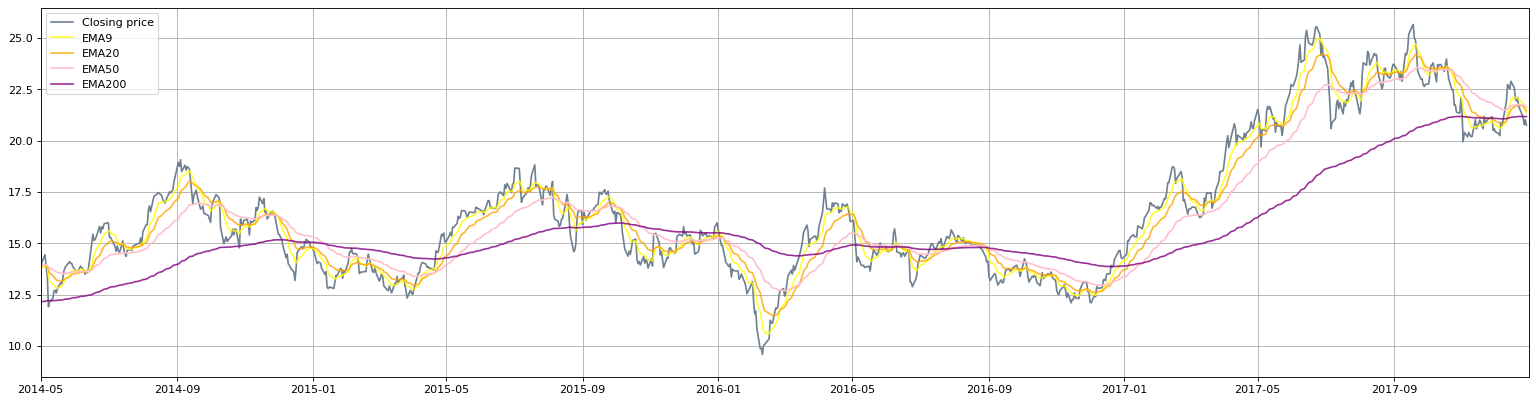

In [37]:

# Plot
plt.figure(figsize=(24, 6), dpi=80)
plt.plot(stock_data['Close'], label="Closing price", color="slategrey")
plt.plot(EMA9, label="EMA9", color="yellow", alpha=0.8)
plt.plot(EMA20, label="EMA20", color="orange", alpha=0.8)
plt.plot(EMA50, label="EMA50", color="pink", alpha=1)
plt.plot(EMA200, label="EMA200", color="purple", alpha=0.8)
plt.legend()
plt.xlim(pd.to_datetime('2014-05-01'), pd.to_datetime('2017-12-31'))
plt.grid(visible=True, which = 'both')
plt.show()

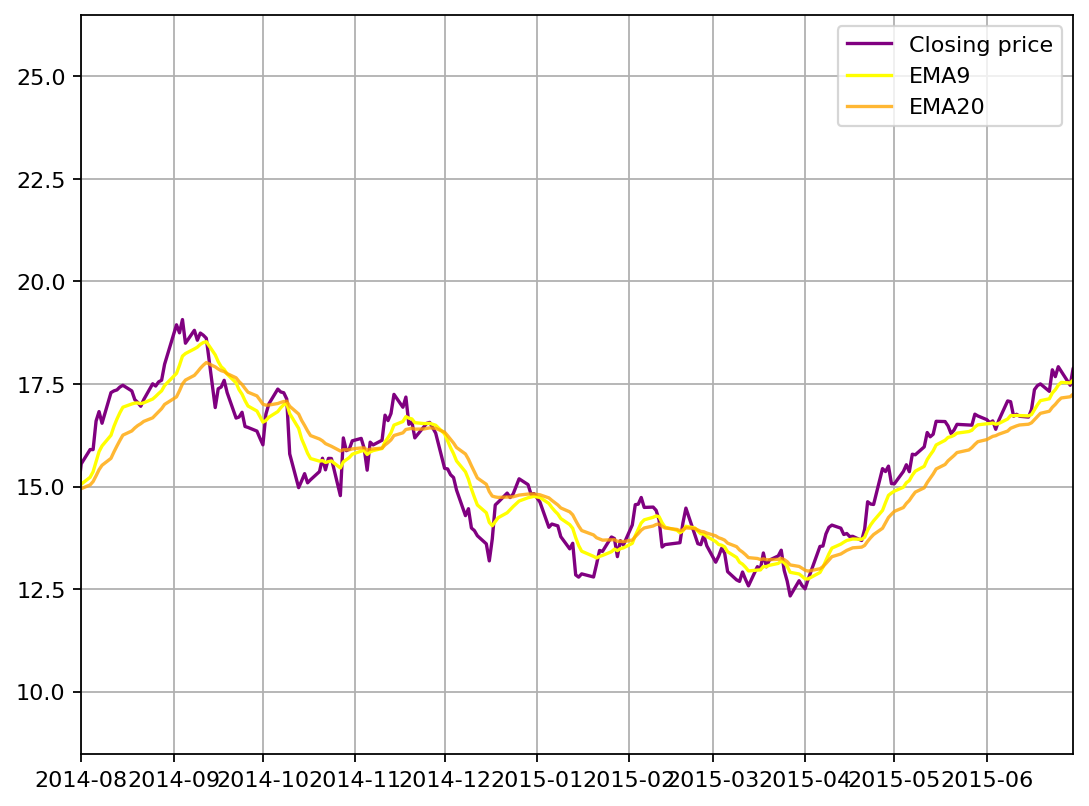

In [38]:
## plot Sep 2014 to Jun 2015
plt.figure(figsize=(8, 6), dpi=160)
plt.plot(stock_data['Close'], label="Closing price", color="purple")
plt.plot(EMA9, label="EMA9", color="yellow")
plt.plot(EMA20, label="EMA20", color="orange", alpha=0.8)
plt.legend()
plt.xlim(pd.to_datetime('2014-08-01'), pd.to_datetime('2015-06-30'))
plt.grid(visible=True, which = 'both')
plt.show()

### Triangular Moving Average

In [39]:
TMA1 = 9
ma10 = stock_data['Close'].rolling(TMA1).mean()
tma1 = ma10.rolling(TMA1).mean()
tma1.dropna(inplace=True)


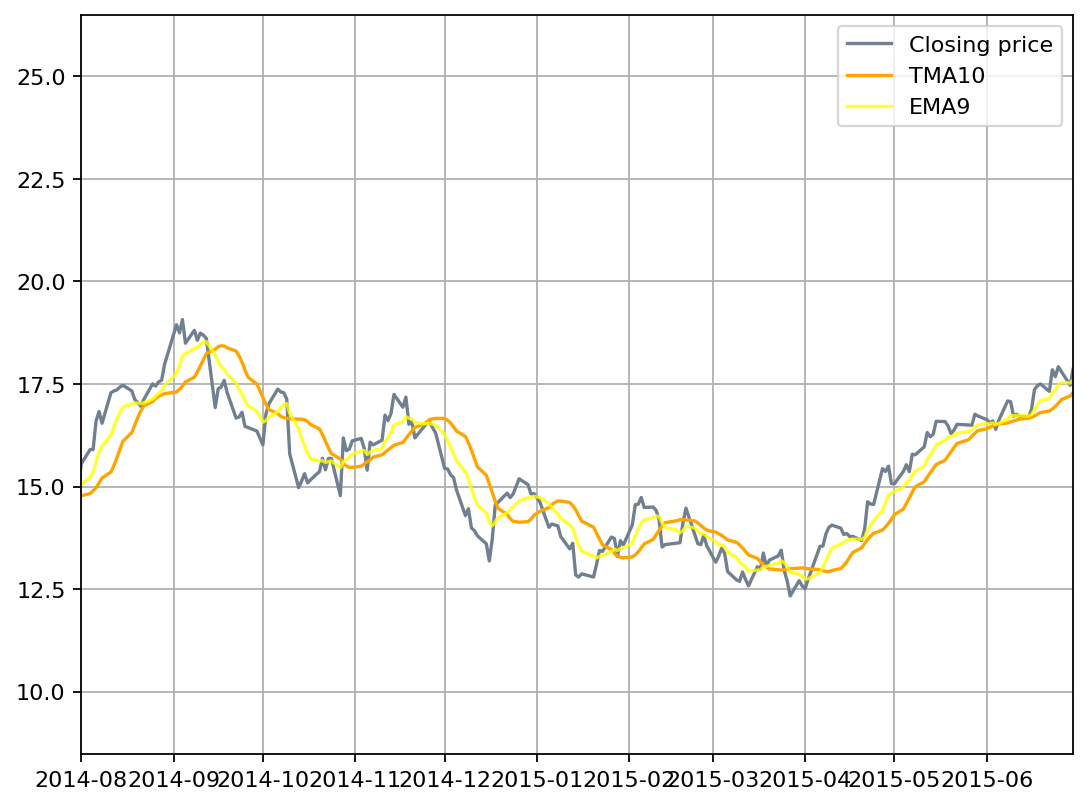

In [40]:
# Plot
plt.figure(figsize=(8, 6), dpi=160)
plt.plot(stock_data['Close'], label="Closing price", color="slategrey")
plt.plot(tma1, label='TMA10', color= 'orange')
plt.plot(EMA9, label="EMA9", color="yellow", alpha=0.8)
plt.legend()
plt.xlim(pd.to_datetime('2014-08-01'), pd.to_datetime('2015-06-30'))
plt.grid(visible=True, which = 'both')
plt.show()


### Smoothen line by poly fit

c:\Users\taliah\miniconda3\Lib\site-packages\numpy\lib\polynomial.py:667: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
c:\Users\taliah\miniconda3\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


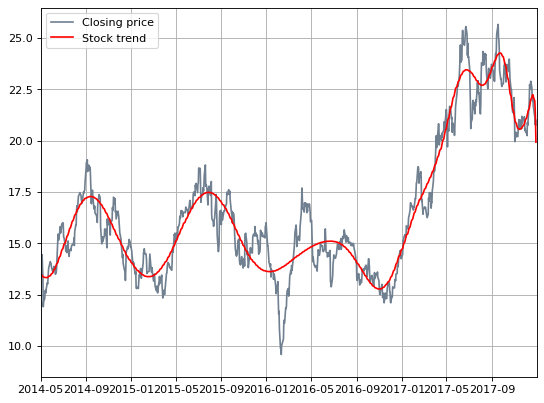

In [41]:
degree = 70
# smaller degree -> take trend with larger time scale

# stock_data_truncated = stock_data.loc[pd.to_datetime('2018-01-01'): pd.to_datetime('2017-12-31')]
# time range too long smoothing effect too rough
X = np.array(stock_data.reset_index().index)
Y = stock_data["Close"].to_numpy()

with warnings.catch_warnings():
    warnings.simplefilter("ignore", np.RankWarning)
    poly_fit = np.poly1d(np.polyfit(X, Y, degree))

smoothed_data = pd.DataFrame(poly_fit(X),  columns=["Data"])
smoothed_data.index = stock_data.index

plt.figure(figsize=(8, 6), dpi=80)
plt.plot(stock_data['Close'], label="Closing price", color="slategrey")
plt.plot(smoothed_data, label="Stock trend", color='red')
plt.legend()

plt.xlim(pd.to_datetime('2014-05-01'), pd.to_datetime('2017-12-31'))
plt.grid(visible=True, which = 'both')
plt.show()


### Calculate local extrema

method: find location of local maxima of smoothed data

find coressponding actual price on that date

put into new df peaks and bottoms

In [62]:
# Find local minima
interval = 10
bottom_indexs = argrelextrema(smoothed_data.to_numpy(), np.less)[0]
bottom_dates = []
bottom_close = []
for index in bottom_indexs:
    lower_boundary = index - interval
    if lower_boundary < 0:
        lower_boundary = 0
    upper_boundary = index + interval + 1
    if upper_boundary > len(stock_data) - 1:
        upper_boundary = len(stock_data)
    stock_data_in_interval = stock_data.iloc[list(range(lower_boundary, upper_boundary))]
    bottom_dates.append(stock_data_in_interval["Close"].idxmin())
    bottom_close.append(stock_data_in_interval["Close"].min())
bottoms = pd.DataFrame({"Close": bottom_close}, index=bottom_dates)
bottoms.index.name = "Date"



In [63]:
display(stock_data)

,Close,ma1,ma2,ma3,ma4
Date,,,,,
2014-01-02,10.006667,NaN,NaN,NaN,NaN
2014-01-03,9.970667,NaN,NaN,NaN,NaN
2014-01-06,9.800000,NaN,NaN,NaN,NaN
2014-01-07,9.957333,NaN,NaN,NaN,NaN
2014-01-08,10.085333,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2017-12-22,21.680000,21.506433,21.510053,22.586700,21.951167
2017-12-26,21.152666,21.508033,21.459013,22.566833,21.974873
2017-12-27,20.775999,21.488333,21.407067,22.536653,21.992753


In [64]:
peak_indexes = argrelextrema(smoothed_data.to_numpy(), np.greater)[0]
peak_dates = []
peak_close = []
for index in peak_indexes: #smoothed peak index
    lower_boundary = index - interval
    if lower_boundary < 0:
        lower_boundary = 0
    upper_boundary = index + interval + 1
    if upper_boundary > len(stock_data) - 1:
        upper_boundary = len(stock_data)
    stock_data_in_interval = stock_data.iloc[list(range(lower_boundary, upper_boundary))]
    peak_dates.append(stock_data_in_interval["Close"].idxmax())
    peak_close.append(stock_data_in_interval["Close"].max())
peaks = pd.DataFrame({"Close": peak_close}, index=peak_dates)
peaks.index.name = "Date"
peaks

,Close
Date,
2014-03-04,16.989332
2014-09-04,19.069332
2015-07-20,18.817333
2016-06-08,15.701333
2017-06-23,25.563334
2017-09-18,25.666668
2017-12-15,22.896667


In [70]:
# add local extrema to df
extrema_dates = peak_dates + bottom_dates
extrema_val = peak_close + bottom_close

local_extrema = pd.DataFrame({'date': extrema_dates, 'price': extrema_val})
local_extrema = local_extrema.sort_values(by = 'date')
local_extrema = local_extrema.set_index('date')



### calculate percentage change of each extrema point

In [66]:
percentage_change_lst =[np.nan]
for i in range(1, len(local_extrema)):
    #print(local_extrema['price'][i])
    percentage_change = (local_extrema['price'][i]-local_extrema['price'][i-1])/local_extrema['price'][i-1]
    #print(percentage_change)
    percentage_change_lst.append(percentage_change)

# pd.DataFrame({'percetage': percentage_change_lst})
local_extrema['percentage change'] = percentage_change_lst
# local_extrema['percentage change'] = local_extrema['percentage change'].apply(lambda x: "{:.2%}".format(x))dr
# merge = pd.merge(local_extrema, pd.DataFrame(
#     {'percetage': percentage_change_lst}),
#     left_on = ['date','price'], right_on='price')

print(tabulate(local_extrema, headers='keys', tablefmt='psql', floatfmt=(None,".2f", ".2%")))


+---------------------+---------+---------------------+
| date                |   price |   percentage change |
|---------------------+---------+---------------------|
| 2014-01-13 00:00:00 |    9.29 |                nan% |
| 2014-03-04 00:00:00 |   16.99 |              82.89% |
| 2014-05-08 00:00:00 |   11.91 |             -29.92% |
| 2014-09-04 00:00:00 |   19.07 |              60.17% |
| 2015-03-02 00:00:00 |   13.16 |             -31.01% |
| 2015-07-20 00:00:00 |   18.82 |              43.04% |
| 2016-01-26 00:00:00 |   12.90 |             -31.42% |
| 2016-06-08 00:00:00 |   15.70 |              21.68% |
| 2016-11-14 00:00:00 |   12.10 |             -22.96% |
| 2017-06-23 00:00:00 |   25.56 |             111.33% |
| 2017-08-01 00:00:00 |   21.30 |             -16.66% |
| 2017-09-18 00:00:00 |   25.67 |              20.47% |
| 2017-11-02 00:00:00 |   19.95 |             -22.27% |
| 2017-12-15 00:00:00 |   22.90 |              14.77% |
+---------------------+---------+---------------

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


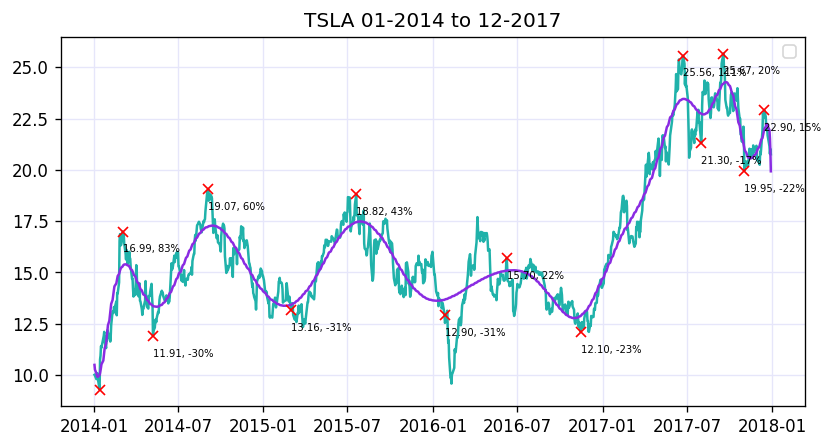

In [67]:
# plot local extrema
plt.figure(figsize=(8, 4), dpi=120)
plt.plot(stock_data['Close'], color='lightseagreen')
plt.plot(smoothed_data, color='blueviolet')

plt.plot(local_extrema['price'], "x", color='red')
for date, extrema, percent in zip(local_extrema.index, local_extrema['price'], local_extrema['percentage change']):
    plt.annotate("{:.2f}".format(extrema)
                 + ", {:.0%}".format(percent), (date, extrema-1), fontsize=6)
plt.legend()

plt.grid(which='major', color='lavender')
plt.grid(which='minor', color='lavender')
plt.title('TSLA 01-2014 to 12-2017')
plt.show()